In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In [2]:
df = pd.read_csv('./Datasets/bitcoin_price.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,4228.29,4427.84,3998.11,4376.53,"2,697,970,000","69,954,400,000"
1,2017-09-04,4591.63,4591.63,4108.40,4236.31,"2,987,330,000","75,955,500,000"
2,2017-09-03,4585.27,4714.08,4417.59,4582.96,"1,933,190,000","75,841,700,000"
3,2017-09-02,4901.42,4975.04,4469.24,4578.77,"2,722,140,000","81,060,600,000"
4,2017-09-01,4701.76,4892.01,4678.53,4892.01,"2,599,080,000","77,748,400,000"


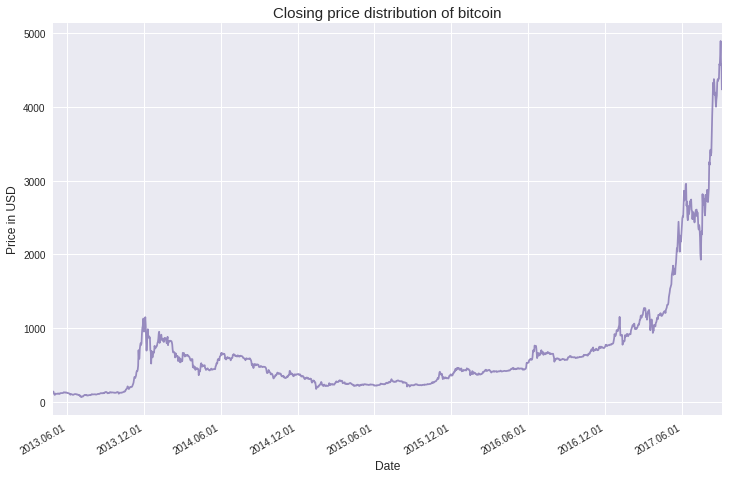

In [4]:
import matplotlib.dates as mdates
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df['Close'].values, time=df['Date_mpl'].values, alpha=0.8, color=color[3], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

/home/rohanvardhan/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


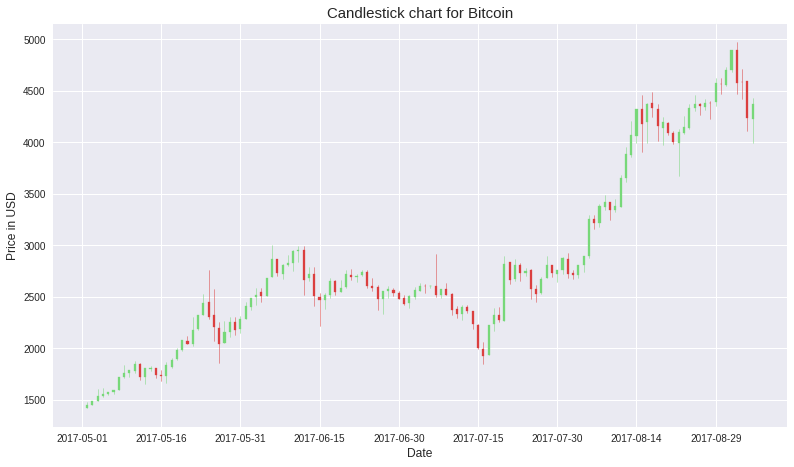

In [5]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1), (0,0))

temp_df = df[df['Date']>'2017-05-01']
ohlc = []
for ind, row in temp_df.iterrows():
    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)
plt.title("Candlestick chart for Bitcoin", fontsize=15)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

In [6]:
df = pd.read_csv('./Datasets/bitcoin_price.csv', parse_dates=['Date'], usecols=['Date','Close'])

In [7]:
df.columns = ["ds", "y"]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 2 columns):
ds    1592 non-null datetime64[ns]
y     1592 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.0 KB


In [9]:
df_test = df[1562:]

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 1562 to 1591
Data columns (total 2 columns):
ds    30 non-null datetime64[ns]
y     30 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 564.0 bytes


In [11]:
from fbprophet import Prophet

In [12]:
m = Prophet()
m.fit(df[:1562]);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1587,2017-10-01,3880.055047,3675.076335,4088.588808
1588,2017-10-02,3895.913308,3695.110475,4089.327377
1589,2017-10-03,3911.493912,3712.981580,4112.516958
1590,2017-10-04,3919.071733,3716.743973,4127.432104
1591,2017-10-05,3935.178645,3733.664432,4158.632409


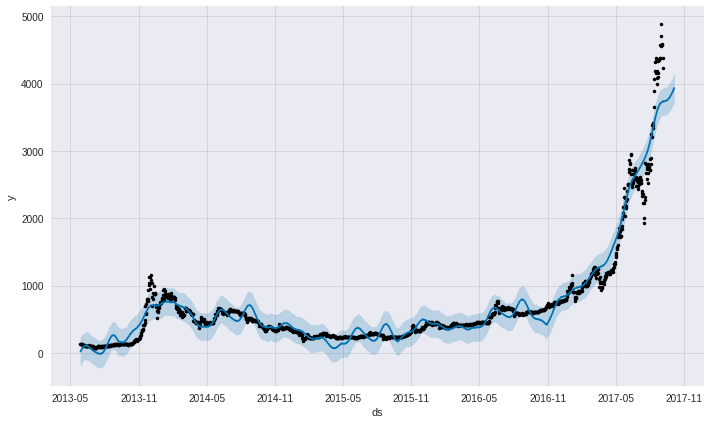

In [24]:
p = m.plot(forecast)

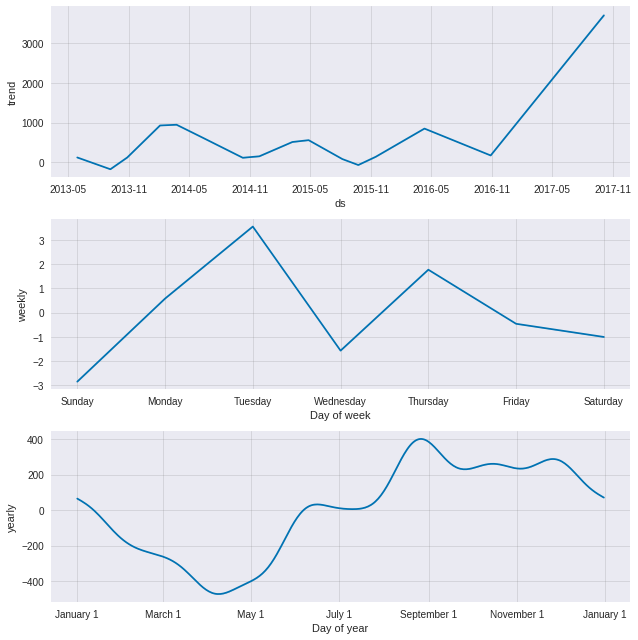

In [25]:
p = m.plot_components(forecast)